In [45]:
#Importamos las librerías correspondientes
# Importamos la librería ImageDataGenerator,
from keras.preprocessing.image import ImageDataGenerator
# Importamos la librería  array_to_img, img_to_array, load_img
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
# Importamos la librería glob
import glob
# Importamos la librería plt
import matplotlib.pyplot as plt 
# Importamos la librería os
import os
#Importamos la libreria shutil
import shutil
#Importamos la libreria random
import random
from skimage import io

## Descripción del dataset

El presente dataset incorpora fotos de los estudiantes de sexto semestre de la carrera de Ingenieria en tecnologias de la información, cuyo objetivo es la aplicación de las mismas para realizar un reconocimiento facial identificando el nombre de cada uno de los participantes.

## Carga del dataset

In [46]:
# Definimos la ruta del dataset
folder = 'C:\PROYECTOIA-U3/'

In [47]:
#Se observa los nombres de las carpetas
nombres = os.listdir(folder)
# Imprimimos los nombres
print(nombres)

['Ariel Chabla', 'ArroboMercy', 'BarraganSteven', 'CevallosJoan', 'EnriquezSelena', 'GenesisHeredia', 'GoyesAnthony', 'Hector Cedeño', 'Jhon Zambrano', 'Jordan Espinosa', 'Jorge Borrero', 'JoseRuiz', 'LeonardoBorja', 'LucioCarlos', 'MelanyLopez', 'MosqueraLucy', 'Nataly Acosta', 'OlallaLuis', 'ParragaMariaJose', 'PauteKevin', 'Raymond Davila', 'RivasSelena', 'SalazarJohana', 'Solano Wilmer', 'SolorzanoBryan']


In [48]:
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder + "/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        # Imprimimos la acción realizada
        print("Copying Image - {} in Fotos_Augmented_1/{}".format(element, class_name))
        # Definimos la ruta de origen de los elementos
        src = os.path.join(folder + "/" + class_name, element) # origen
        # Definimos la ruta de destino de los elementos
        dst = os.path.join("C:\Fotos_Augmented/" + class_name, element) 
        # Realizamos la copia de las fotos
        shutil.copy(src, dst)

Copying Image - L00376418_1.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00376418_2.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00376418_3.jpg in Fotos_Augmented_1/Ariel Chabla
Copying Image - L00385770_1.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00385770_2.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00385770_3.png in Fotos_Augmented_1/ArroboMercy
Copying Image - L00392978_1.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00392978_2.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00392978_3.png in Fotos_Augmented_1/BarraganSteven
Copying Image - L00376416_1.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376416_2.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376416_3.jpg in Fotos_Augmented_1/CevallosJoan
Copying Image - L00376481_1.jpg in Fotos_Augmented_1/EnriquezSelena
Copying Image - L00376481_2_.jpg in Fotos_Augmented_1/EnriquezSelena
Copying Image - L00376481_3.jpg in Fotos_Augmented_1/EnriquezSelena


## Impresión del dataset

- Dimensiones de la imagen:
(192, 192, 3)


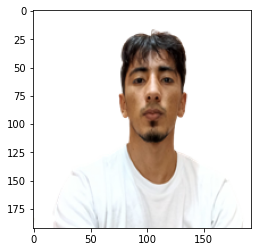

- Dimensiones de la imagen:
(172, 129, 3)


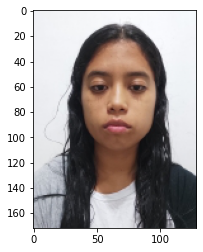

- Dimensiones de la imagen:
(192, 192, 3)


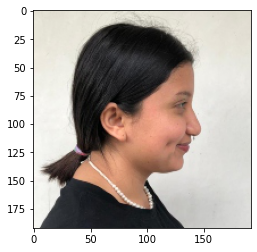

- Dimensiones de la imagen:
(594, 594, 4)


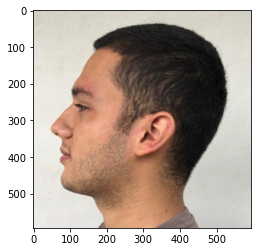

- Dimensiones de la imagen:
(193, 193, 4)


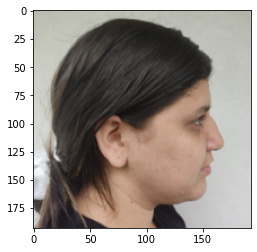

- Dimensiones de la imagen:
(1221, 1221, 3)


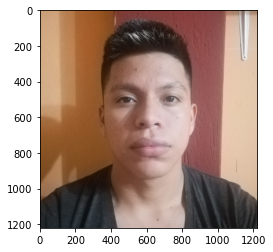

- Dimensiones de la imagen:
(600, 600, 3)


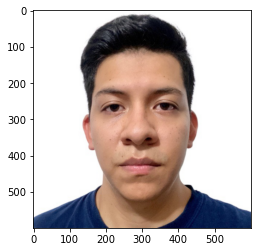

- Dimensiones de la imagen:
(193, 193, 4)


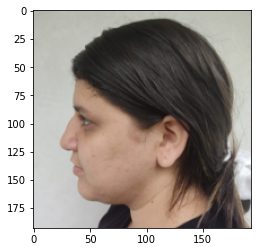

- Dimensiones de la imagen:
(192, 193, 3)


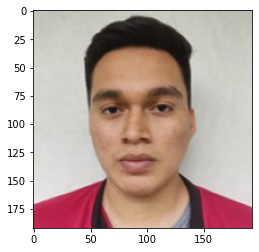

In [54]:
image = []
#Creamos un bucle que se ejecutara hasta que se hayan leido todas las clases
for class_name in nombres:
    # Creamos una ruta especifica con el nombre de la clase
    cur_path = folder + "/" + class_name
    # Obtenemos los elementos de la ruta indicada
    elements = os.listdir(cur_path)
    #Definimos un bucle que lea todos los elementos
    for element in elements:
        image.append(io.imread(folder + "/" + class_name +'/'+ element)/255.0) # imread lee las imagenes con los pixeles codificados como enteros 
        # en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
        
for i in range(9):
    print("- Dimensiones de la imagen:")
    ran = random.randint(0, len(image) - 1)
    print(image[ran].shape)
    plt.imshow(image[ran],vmin=0,vmax=1)
    plt.show()

## Data Aumentation 

In [50]:
# Definimos las caracteristicas de las imagenes
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.4,
        horizontal_flip=True,
        fill_mode='nearest')